In [2]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df=pd.read_csv('globalterrorism.csv')
df.head()

<IPython.core.display.Javascript object>

C:\Users\abc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(181691, 135)

In [8]:
dataset = pd.DataFrame(df,columns=["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt","provstate",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"])
dataset.head()

<IPython.core.display.Javascript object>

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,NaN,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,NaN,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,NaN,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,NaN,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,NaN,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [9]:
dataset.shape

(181691, 15)

In [10]:
assassination = df[df['attacktype1_txt'].str.contains("Assassination",na=False)]
assassination.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,...,Conflicting reports attribute the incident to ...,Committee on the Judiciary United States Sena...,"William Sater, ""Puerto Rican Terrorists: A Pos...","""Toward People's War for Independence and Soci...",Hewitt Project,0,1,0,1,NaN


In [11]:
assassination.shape

(19312, 135)

In [12]:
assassination.groupby("country_txt").size().sort_values(ascending=False)

country_txt
United Kingdom       1651
Pakistan             1406
Colombia             1343
Iraq                 1287
India                1229
                     ... 
Estonia                 1
Equatorial Guinea       1
Suriname                1
Swaziland               1
Moldova                 1
Length: 173, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='country_txt'>

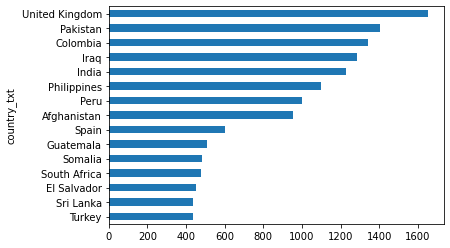

In [13]:
co=sns.color_palette("Spectral", as_cmap=True)
assassination.groupby("country_txt").size().sort_values(ascending=False).head(15).sort_values().plot(kind='barh')

<AxesSubplot:ylabel='region_txt'>

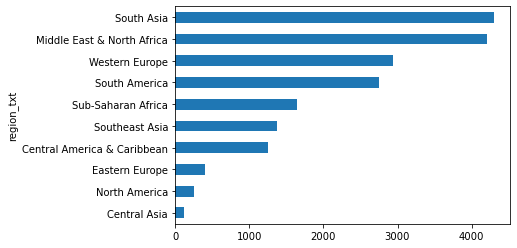

In [14]:
assassination.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

<AxesSubplot:ylabel='imonth'>

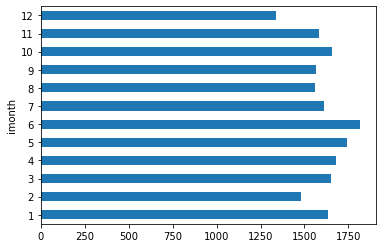

In [15]:
assassination.groupby("imonth").size().plot(kind="barh")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='imonth', ylabel='count'>

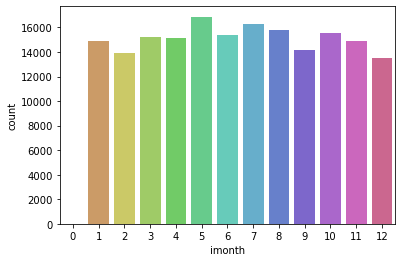

In [16]:
sns.countplot(x=df["imonth"],data=df,palette='hls')

In [17]:
X = df.iloc[:,0:12]
Y = df.iloc[:,12]

array([[<AxesSubplot:title={'center':'eventid'}>,
        <AxesSubplot:title={'center':'iyear'}>,
        <AxesSubplot:title={'center':'imonth'}>],
       [<AxesSubplot:title={'center':'iday'}>,
        <AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'success'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

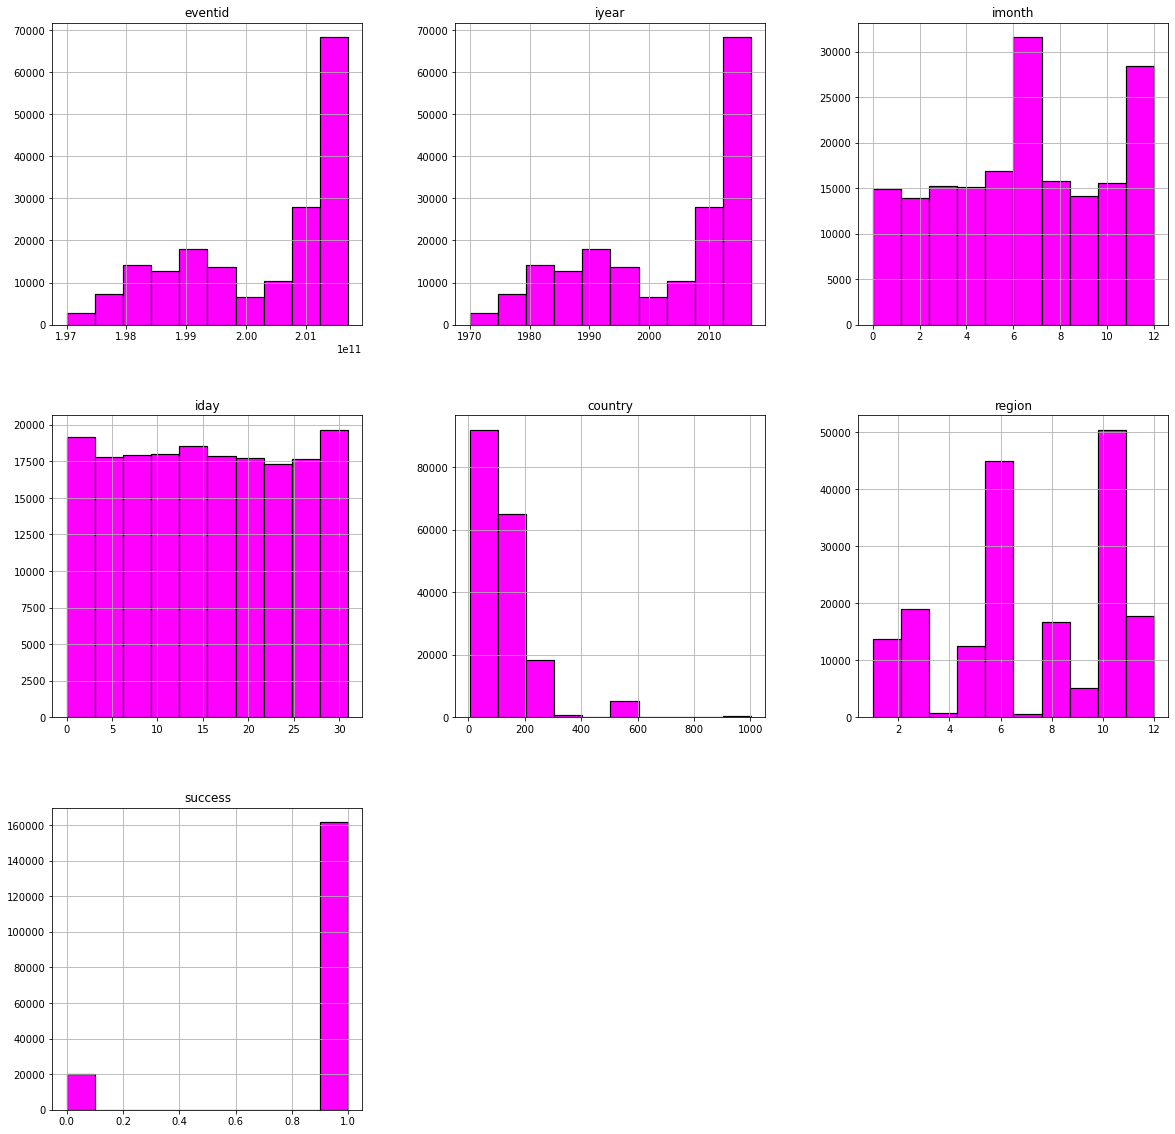

In [18]:
dataset.hist(color='magenta',edgecolor='black', linewidth=1.2, figsize=(20, 20))

In [19]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

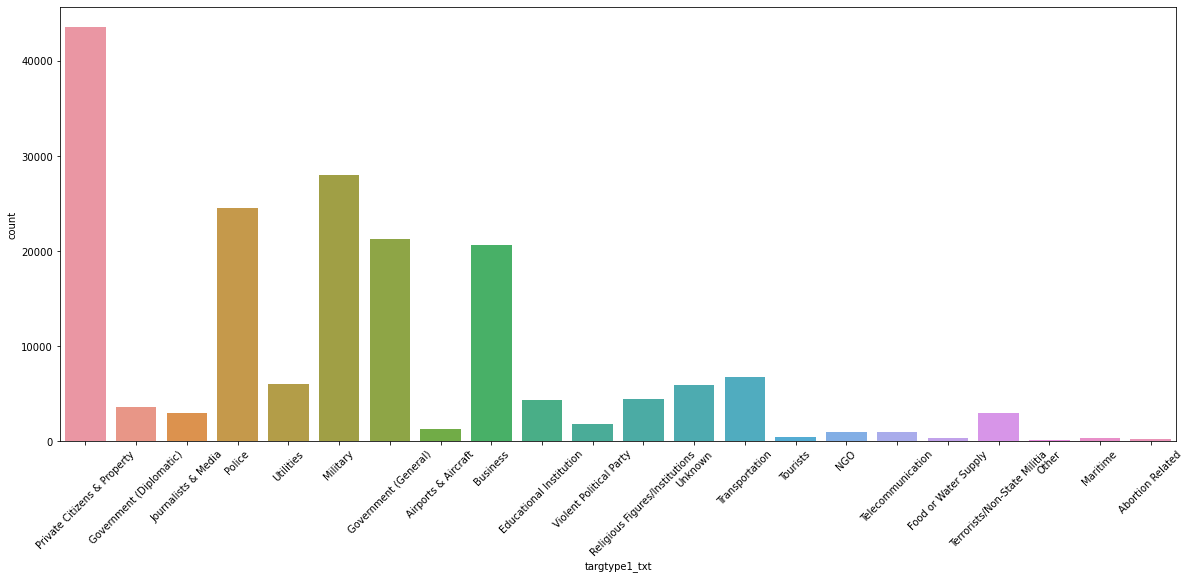

In [20]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(x=df['targtype1_txt'])
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='iyear', ylabel='count'>

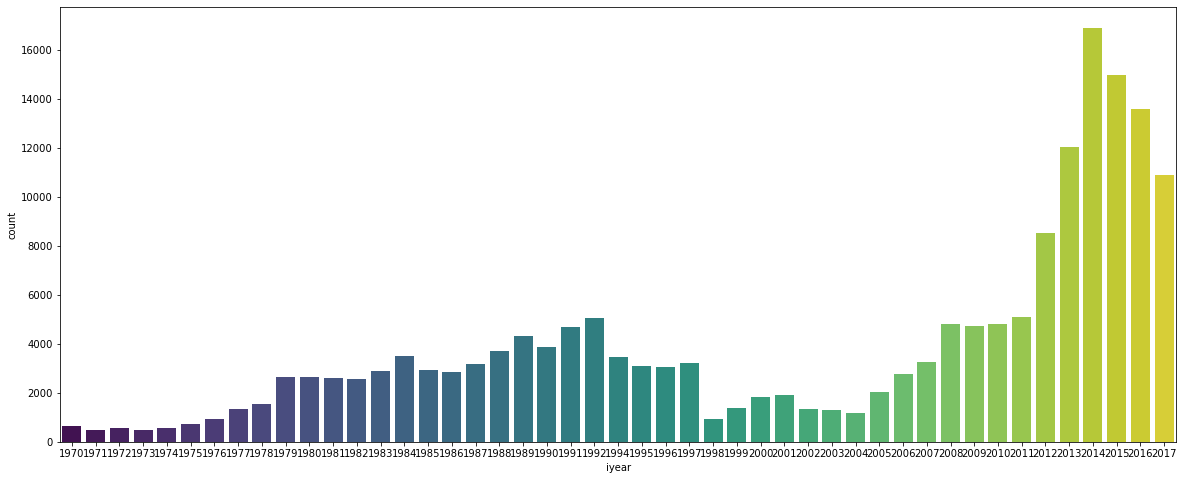

In [21]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['iyear'],palette='viridis')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\abc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


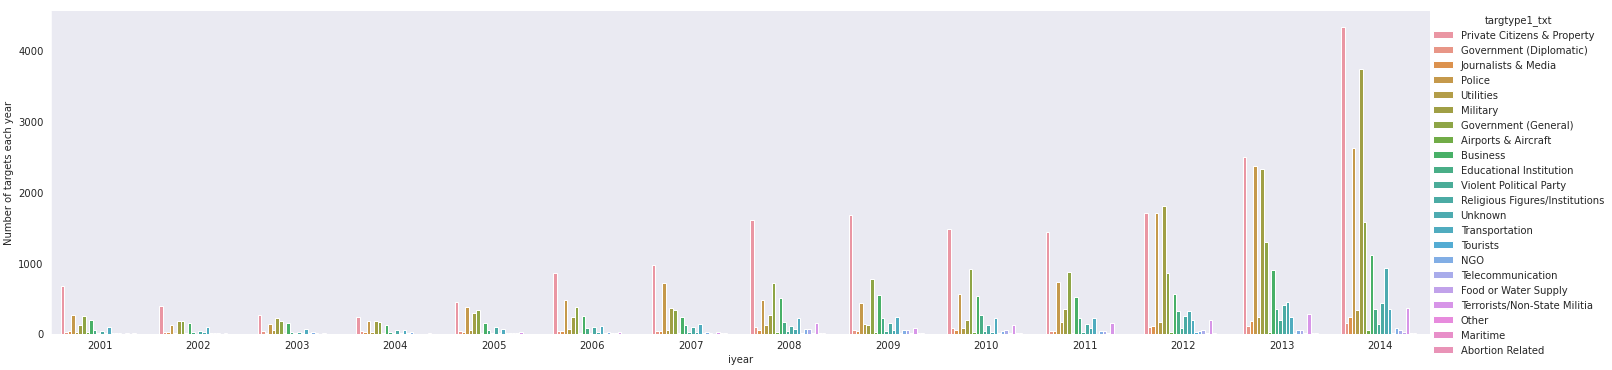

In [22]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='targtype1_txt', order=range(2001, 2015))
    g.set_ylabels('Number of targets each year')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\abc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


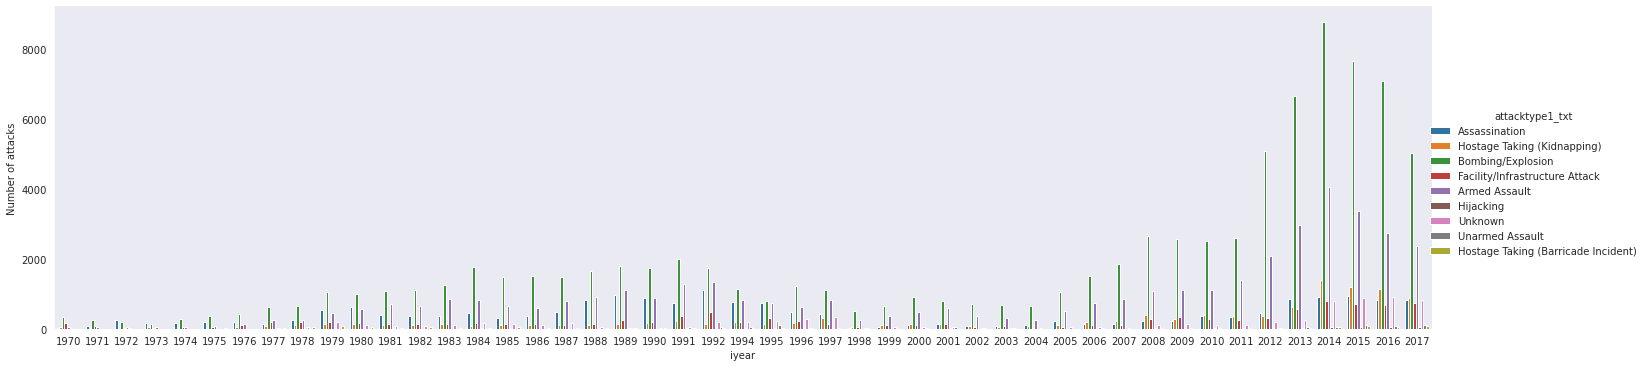

In [23]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=df, aspect=4.0, kind='count',
                       hue='attacktype1_txt')
    g.set_ylabels('Number of attacks')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='iday', ylabel='count'>

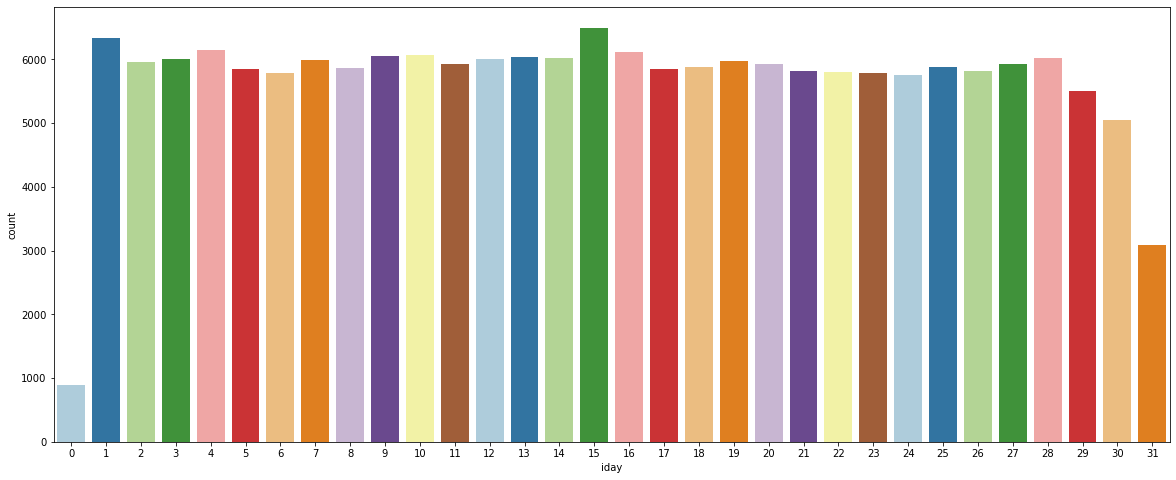

In [24]:
plt.figure(figsize=(20,8))
sns.countplot(x='iday',data=df,palette='Paired')